## Module 4, Activity 2: Heatmaps

Here, we're going to make a heatmap of Australia's export volumes (in USD) to other countries, from 2017-2021. We're using data from the [UN Comtrade Database](https://comtrade.un.org). To make our heatmap, we'll use Matplotlib's **[imshow](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html)** function. But, you can easily make heatmaps with other Python plotting libraries, like [Seaborn](https://seaborn.pydata.org/generated/seaborn.heatmap.html) or [Plotly](https://plotly.com/python/heatmaps/). You're encouraged to explore those other plotting libraries as well. Let's import the packages we need, and our trade data.

In [80]:
# import packages/libraries
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

trade_df = pd.read_csv("data/comtrader_data_all.csv")
trade_df

,year,trade_flow,reporter,partner,trade_value_usd
0,2017,Export,Australia,Indonesia,4.887553e+09
1,2017,Export,Australia,New Zealand,6.801320e+09
2,2017,Export,Australia,Thailand,3.055521e+09
3,2017,Export,Australia,United Kingdom,4.549840e+09
4,2017,Export,Australia,USA,8.434027e+09
5,2018,Export,Australia,Indonesia,4.796025e+09
6,2018,Export,Australia,New Zealand,7.166741e+09
7,2018,Export,Australia,Thailand,4.882533e+09
8,2018,Export,Australia,United Kingdom,3.610942e+09
9,2018,Export,Australia,USA,9.552146e+09


Our data is in long-form, but for plotting heatmaps with Matplotlib, we need to transform our data to wide-form, where rows our partner countries, and columns are years. We also need a list of the row and column names. We can use the [**pivot**](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pivot.html) function from Pandas to make this transformation. We'll also extract our years and partner country labels too. Finally, we need to convert our wide-form Pandas dataframe to a numpy array. Take your time working through these steps and make sure you understand what each line of code is doing.

In [81]:
trade_wide = pd.pivot(trade_df, index = "partner", columns = "year", values = "trade_value_usd") # Pivot trade_df from long-form to wide-form
years = [str(x) for x in trade_wide.columns] # Extract years from column labels, then convert from integer to string format
countries = list(trade_wide.index) # Extract partner country names from row labels of trade_wide
trade_wide_np = trade_wide.to_numpy() # Convert trade_wide to numpy array

Now we're ready to make a heatmap. Let's start with something basic, then experiment with our figure's attributes.

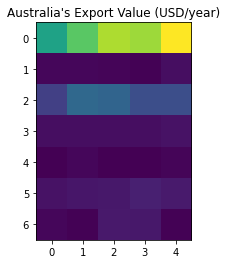

In [82]:
fig, ax = plt.subplots()
im = ax.imshow(trade_wide_np, cmap = "viridis")
ax.set_title("Australia's Export Value (USD/year)")
plt.show()

We can change our colour map with the **cmap** variable. Check out the range of options [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html). But first, let's add in x and y-axis tick labels.

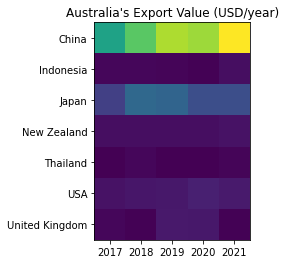

In [83]:
fig, ax = plt.subplots()
im = ax.imshow(trade_wide_np, cmap = "viridis")
ax.set_title("Australia's Export Value (USD/year)")

## Set x and y-axis tick labels
ax.set_xticks(np.arange(len(years)), # Location of current x-ticks 0,1,2,3
              labels=years) # Labels at current x-tick locations
ax.set_yticks(np.arange(len(countries)), # Location of current y-ticks 0,1,2,3,4,5
              labels=countries) # Labels at current y-tick locations
plt.show()

These labels look pretty good, we can modify their font and text size using what we learned in Module 3. But, what if our x-tick labels were longer? Then we might want to plot them at an angle.

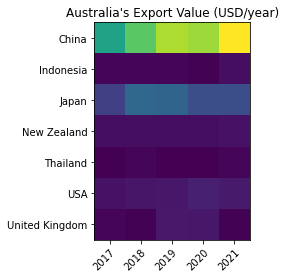

In [84]:
fig, ax = plt.subplots()
im = ax.imshow(trade_wide_np, cmap = "viridis")
ax.set_title("Australia's Export Value (USD/year)")

## Set x and y-axis tick labels
ax.set_xticks(np.arange(len(years)), # Location of current x-ticks 0,1,2,3
              labels=years) # Labels at current x-tick locations
ax.set_yticks(np.arange(len(countries)), # Location of current y-ticks 0,1,2,3,4,5
              labels=countries) # Labels at current y-tick locations

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), # Artist whose attributes are being set or queried (x-tick labels)
         rotation=45, # Rotation from horizontal
         ha="right", # Direction of rotation
         rotation_mode="anchor") # "Anchors" rotation to axis tick, not mid-point of tick label

plt.show()



Next, we need to include a colour bar otherwise our audience can't decode the colours in our heatmap.

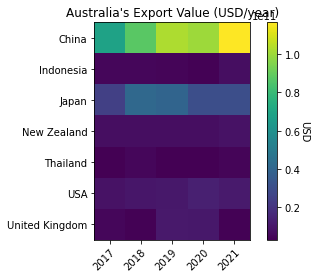

In [85]:
fig, ax = plt.subplots()
im = ax.imshow(trade_wide_np, cmap = "viridis")
ax.set_title("Australia's Export Value (USD/year)")

## Set x and y-axis tick labels
ax.set_xticks(np.arange(len(years)), # Location of current x-ticks 0,1,2,3
              labels=years) # Labels at current x-tick locations
ax.set_yticks(np.arange(len(countries)), # Location of current y-ticks 0,1,2,3,4,5
              labels=countries) # Labels at current y-tick locations

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), # Artist whose attributes are being set or queried (x-tick labels)
         rotation=45, # Rotation from horizontal
         ha="right", # Direction of rotation
         rotation_mode="anchor") # "Anchors" rotation to axis tick, not mid-point of tick label

# Add colourbar
cbar = ax.figure.colorbar(im, # Heatmap for which the colour bar will be drawn. 
                          ax=ax) # Axes into which the colour bar will be drawn (useful if you're making multiple heatmaps in one figure)
cbar.ax.set_ylabel(ylabel = "USD", rotation=-90, va="center") # Set the label and label location for the colour bar.
    
plt.show()

Finally, let's annotate each cell with its export value. We learned how to annotate figures with text in Module 3. Since **ax.text** can only annotate a single point at a time, we need a for loop for this.

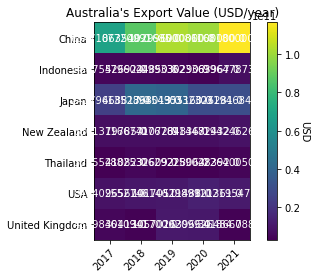

In [86]:
fig, ax = plt.subplots()
im = ax.imshow(trade_wide_np, cmap = "viridis")
ax.set_title("Australia's Export Value (USD/year)")

## Set x and y-axis tick labels
ax.set_xticks(np.arange(len(years)), # Location of current x-ticks 0,1,2,3
              labels=years) # Labels at current x-tick locations
ax.set_yticks(np.arange(len(countries)), # Location of current y-ticks 0,1,2,3,4,5
              labels=countries) # Labels at current y-tick locations

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), # Artist whose attributes are being set or queried (x-tick labels)
         rotation=45, # Rotation from horizontal
         ha="right", # Direction of rotation
         rotation_mode="anchor") # "Anchors" rotation to axis tick, not mid-point of tick label

# Add colourbar
cbar = ax.figure.colorbar(im, # Heatmap for which the colour bar will be drawn. 
                          ax=ax) # Axes into which the colour bar will be drawn (useful if you're making multiple heatmaps in one figure)
cbar.ax.set_ylabel(ylabel = "USD", rotation=-90, va="center") # Set the label and label location for the colour bar.
    
# Loop over data dimensions and create text annotations.
for i in range(len(countries)): # Loop over rows (partner countries)
    for j in range(len(years)): # Loop over columns (years)
        text = ax.text(j, # x-axis location of cell
                       i, # y-axis location of cell
                       trade_wide_np[i, j], # text annotation for current cell
                       ha="center", va="center", # Location of text within the cell
                       color="w") # color of annotation
        

        
plt.show()

The numbers are way too big for the cells. We can start to fix this by changing the aspect ratio of the heatmap using [**ax.set_aspect**](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_aspect.html):

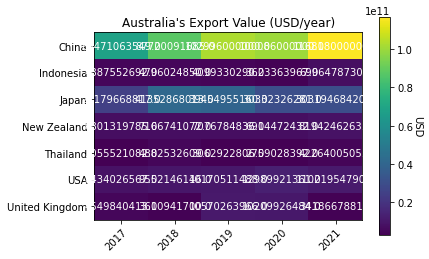

In [87]:
fig, ax = plt.subplots()
im = ax.imshow(trade_wide_np, cmap = "viridis")
ax.set_title("Australia's Export Value (USD/year)")

## Set x and y-axis tick labels
ax.set_xticks(np.arange(len(years)), # Location of current x-ticks 0,1,2,3
              labels=years) # Labels at current x-tick locations
ax.set_yticks(np.arange(len(countries)), # Location of current y-ticks 0,1,2,3,4,5
              labels=countries) # Labels at current y-tick locations

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), # Artist whose attributes are being set or queried (x-tick labels)
         rotation=45, # Rotation from horizontal
         ha="right", # Direction of rotation
         rotation_mode="anchor") # "Anchors" rotation to axis tick, not mid-point of tick label

# Add colourbar
cbar = ax.figure.colorbar(im, # Heatmap for which the colour bar will be drawn. 
                          ax=ax) # Axes into which the colour bar will be drawn (useful if you're making multiple heatmaps in one figure)
cbar.ax.set_ylabel(ylabel = "USD", rotation=-90, va="center") # Set the label and label location for the colour bar.
    
# Loop over data dimensions and create text annotations.
for i in range(len(countries)): # Loop over rows (partner countries)
    for j in range(len(years)): # Loop over columns (years)
        text = ax.text(j, # x-axis location of cell
                       i, # y-axis location of cell
                       trade_wide_np[i, j], # text annotation for current cell
                       ha="center", va="center", # Location of text within the cell
                       color="w") # color of annotation

# Set aspect ratio
ax.set_aspect(0.5) # Set y/x scale (for every 1 axis-tick increase in the y-direction, increase by 2 in the x-direction)
        
plt.show()

This helps, but now our colour bar is too big for our heatmap. To fix this, we need to set our figure's size - Matplotlib at present is using its default values. We do this in the plt.subplots() function.

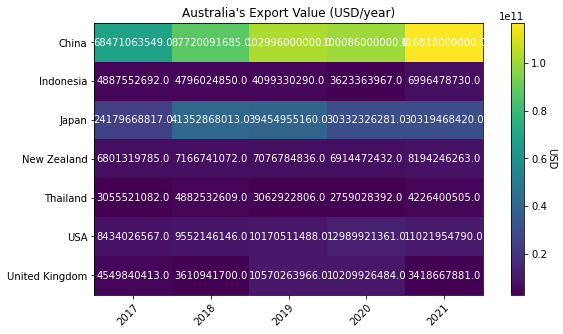

In [88]:
ax_ratio = 0.5 # Control aspect ratio from here, since we need figsize to scale with aspect ratio
ax_width = 10 # Width in inches of figure

fig, ax = plt.subplots(figsize = (ax_width,ax_width*ax_ratio)) # Width, height in inches
im = ax.imshow(trade_wide_np, cmap = "viridis")
ax.set_title("Australia's Export Value (USD/year)")

## Set x and y-axis tick labels
ax.set_xticks(np.arange(len(years)), # Location of current x-ticks 0,1,2,3
              labels=years) # Labels at current x-tick locations
ax.set_yticks(np.arange(len(countries)), # Location of current y-ticks 0,1,2,3,4,5
              labels=countries) # Labels at current y-tick locations

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), # Artist whose attributes are being set or queried (x-tick labels)
         rotation=45, # Rotation from horizontal
         ha="right", # Direction of rotation
         rotation_mode="anchor") # "Anchors" rotation to axis tick, not mid-point of tick label

# Add colourbar
cbar = ax.figure.colorbar(im, # Heatmap for which the colour bar will be drawn. 
                          ax=ax) # Axes into which the colour bar will be drawn (useful if you're making multiple heatmaps in one figure)
cbar.ax.set_ylabel(ylabel = "USD", rotation=-90, va="center") # Set the label and label location for the colour bar.
    
# Loop over data dimensions and create text annotations.
for i in range(len(countries)): # Loop over rows (partner countries)
    for j in range(len(years)): # Loop over columns (years)
        text = ax.text(j, # x-axis location of cell
                       i, # y-axis location of cell
                       trade_wide_np[i, j], # text annotation for current cell
                       ha="center", va="center", # Location of text within the cell
                       color="w") # color of annotation

# Set aspect ratio
ax.set_aspect(0.5) # Set y/x scale (for every 1 axis-tick increase in the y-direction, increase by 2 in the x-direction)
        
plt.show()

**Exercises:**
1) Changing the aspect ratio of the figure has helped make the numbers clearer, but the numbers are massive, so the cell labels and colour bar are still very difficult to read and interpret. The export values are in the order of billions of dollars per year for all countries. Round the values in trade_wide_np to the nearest billion dollars. Modify your colour bar label and plot title to reflect the change in units.\
2) Experiment with the colour scale, using the range of options [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html) as a starting point.\
3) China is Australia's largest export trade partner by a large margin, which makes it very difficult to interpret the values for the other partner countries. Create a new heatmap of export value, excluding China.\
4) We've chosen a white colour for the cell labels in the heatmap above. This makes it hard to see the export value in some cells, where the colour is not dark. Experiment with the text annotation colour. If you'd like a challenge, see if you can use the **annotate_heatmap** helper function described [here](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html#using-the-helper-function-code-style), which sets each annotation's colour to obtain a better contrast against the colour of the cell it's in.
5) Using what you learned in Module 3, is there anything else we can do with this heatmap to make it clearer (e.g., modify fonts, labels and colour bar position?).